In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import glob
mpl.rc('font',family='Times New Roman')
font = {'fontname':'Times New Roman'}
size = {'fontsize':12}

In [156]:
'''
Functions
'''
#MAKE SURE THAT THE HEADER IS THE SAME! PMMA IS NOT
#add 4 lines of: ,, anywhere before the data in PMMA and this will even it out
def file_reader(files):
    files = glob.glob(files)
    data = {}
    for file in files:
        name = (file.split('/')[1]).split('_')[0][4:]
        data[name] = np.array(pd.read_csv(file,header=28))
    return data

def ques1(array):
    return np.mean(array),np.median(array),np.std(array)

def ques3(array,diam):
    area = (diam)**2 / 4
    stress = array[:,2] / area
    strain = array[:,3]
    return strain,stress*1000 #put in
'''
Data Construction
'''

Dict = file_reader('data/*.csv')
flat = np.array(pd.read_csv('data/hardness.txt',sep='\t'))
alb = flat[:,0][flat[:,0] != 0.0]
stb = flat[:,1][flat[:,1] != 0.0]
alrb = flat[:,2]
strb = flat[:,3]
alrc = flat[:,4]
strc = flat[:,5]

In [146]:
'''
Question 1
'''

question1_table = pd.DataFrame([ques1(alb),ques1(stb),ques1(alrb),ques1(strb),ques1(alrc),ques1(strc)]).T
question1_table.columns = ['2024 Brinnel','4340 Brinnel','2024 Rockwell B','4340 Rockwell B','2024 Rockwell C', '4340 Rockwell C']
question1_table.index = ['Mean','Median', 'Standard Deviation']

In [147]:
'''
Question 2
'''

'\nQuestion 2\n'

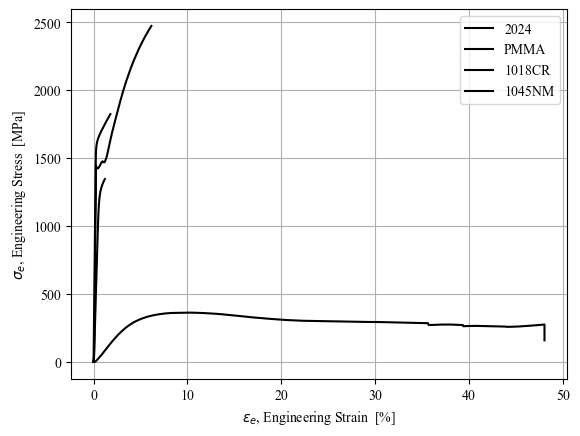

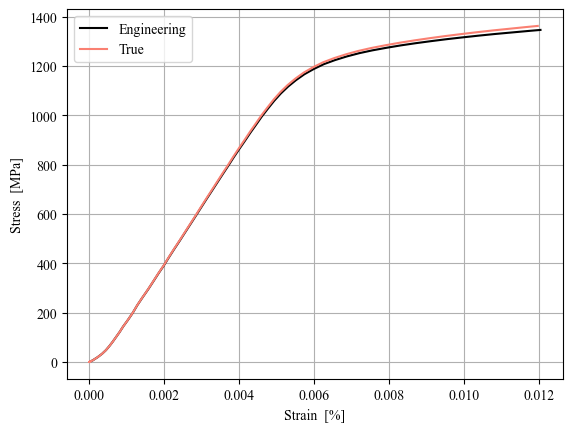

In [176]:
'''
Question 3
'''
radii = [12.80,19.16,12.80,12.72]
for i,k in enumerate(Dict.keys()):
    x,y = ques3(Dict[k],radii[i])
    plt.plot(x*100,y,'k',label=k)
plt.legend()
plt.grid()
plt.xlabel(r'$\epsilon_e$, Engineering Strain  [%]')
plt.ylabel(r'$\sigma_e$, Engineering Stress  [MPa]')
plt.savefig('plots/q3_all.png',dpi=600)
plt.show()

al2024 = Dict['2024']
estrain,estress = ques3(al2024,radii[0])
tstrain,tstress = np.log(1+estrain),estress*(1+estrain)
plt.plot(estrain,estress,'k',label = 'Engineering')
plt.plot(tstrain,tstress,'salmon',label = 'True')
plt.grid()
plt.xlabel(r'Strain  [%]')
plt.ylabel(r'Stress  [MPa]')
plt.legend()
plt.savefig('plots/q3_engvtru.png',dpi = 600)
plt.show()